In [28]:
using StatsPlots

In [100]:
using Turing
using Logging
using LaTeXStrings

In [3]:
?Normal

search: Normal NormalCanon NormalInverseGaussian MvNormal MvNormalCanon



```
Normal(μ,σ)
```

The *Normal distribution* with mean `μ` and standard deviation `σ≥0` has probability density function

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

Note that if `σ == 0`, then the distribution is a point mass concentrated at `μ`. Though not technically a continuous distribution, it is allowed so as to account for cases where `σ` may have underflowed, and the functions are defined by taking the pointwise limit as $σ → 0$.

```julia
Normal()          # standard Normal distribution with zero mean and unit variance
Normal(μ)         # Normal distribution with mean μ and unit variance
Normal(μ, σ)      # Normal distribution with mean μ and variance σ^2

params(d)         # Get the parameters, i.e. (μ, σ)
mean(d)           # Get the mean, i.e. μ
std(d)            # Get the standard deviation, i.e. σ
```

External links

  * [Normal distribution on Wikipedia](http://en.wikipedia.org/wiki/Normal_distribution)


In [4]:
?MvNormal

search: MvNormal MvNormalCanon MvNormalKnownCov MvLogNormal AbstractMvNormal



```
MvNormal
```

Generally, users don't have to worry about these internal details.

We provide a common constructor `MvNormal`, which will construct a distribution of appropriate type depending on the input arguments.

---

```
MvNormal(μ::AbstractVector{<:Real}, Σ::AbstractMatrix{<:Real})
```

Construct a multivariate normal distribution with mean `μ` and covariance matrix `Σ`.

---

```
MvNormal(Σ::AbstractMatrix{<:Real})
```

Construct a multivariate normal distribution with zero mean and covariance matrix `Σ`.


In [7]:
? Binomial

search: Binomial binomial BinomialLogit PoissonBinomial NegativeBinomial



```
Binomial(n,p)
```

A *Binomial distribution* characterizes the number of successes in a sequence of independent trials. It has two parameters: `n`, the number of trials, and `p`, the probability of success in an individual trial, with the distribution:

$$
P(X = k) = {n \choose k}p^k(1-p)^{n-k},  \quad \text{ for } k = 0,1,2, \ldots, n.
$$

```julia
Binomial()      # Binomial distribution with n = 1 and p = 0.5
Binomial(n)     # Binomial distribution for n trials with success rate p = 0.5
Binomial(n, p)  # Binomial distribution for n trials with success rate p

params(d)       # Get the parameters, i.e. (n, p)
ntrials(d)      # Get the number of trials, i.e. n
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Binomial distribution on Wikipedia](http://en.wikipedia.org/wiki/Binomial_distribution)


In [14]:
b = Binomial(9, 0.5)
pdf(b, 6)

0.1640625000000001

In [10]:
methods(Binomial)

# 7 methods for type constructor:
[1] (::Type{Binomial})() in Distributions at /home/shmuma/.julia/packages/Distributions/fXTVC/src/univariate/discrete/binomial.jl:42
[2] (::Type{Binomial})(n::Integer) in Distributions at /home/shmuma/.julia/packages/Distributions/fXTVC/src/univariate/discrete/binomial.jl:41
[3] (::Type{Binomial})(n::Integer, p::Integer) in Distributions at /home/shmuma/.julia/packages/Distributions/fXTVC/src/univariate/discrete/binomial.jl:40
[4] (::Type{Binomial})(n::Integer, p::T; check_args) where T<:Real in Distributions at /home/shmuma/.julia/packages/Distributions/fXTVC/src/univariate/discrete/binomial.jl:32
[5] (::Type{Binomial})(n::ForwardDiff.Dual{var"#s25",var"#s24",N} where N where var"#s24"<:Integer where var"#s25", p::Real) in DistributionsAD at /home/shmuma/.julia/packages/DistributionsAD/pj8zf/src/forwarddiff.jl:20
[6] (::Type{Binomial})(n::Real) in Distributions at /home/shmuma/.julia/packages/Distributions/fXTVC/src/deprecates.jl:15
[7] (::Type{Binomial})(n::Real, p::Real) in Distributions at /home/shmuma/.julia/packages/Distributions/fXTVC/src/deprecates.jl:10

In [13]:
pdf(b, 6)

0.1640625000000001

In [15]:
methods(range)

# 8 methods for generic function "range":
[1] range(i::IntervalSets.TypedEndpointsInterval{:closed,:closed,I}) where I<:Integer in IntervalSets at /home/shmuma/.julia/packages/IntervalSets/VeVgo/src/IntervalSets.jl:251
[2] range(i::IntervalSets.TypedEndpointsInterval{:closed,:closed,T} where T; step, length) in IntervalSets at /home/shmuma/.julia/packages/IntervalSets/VeVgo/src/IntervalSets.jl:259
[3] range(i::IntervalSets.TypedEndpointsInterval{:closed,:closed,T} where T, len::Integer) in IntervalSets at /home/shmuma/.julia/packages/IntervalSets/VeVgo/src/IntervalSets.jl:261
[4] range(i::IntervalSets.TypedEndpointsInterval{:closed,:open,T} where T; length) in IntervalSets at /home/shmuma/.julia/packages/IntervalSets/VeVgo/src/IntervalSets.jl:269
[5] range(i::IntervalSets.TypedEndpointsInterval{:closed,:open,T} where T, len::Integer) in IntervalSets at /home/shmuma/.julia/packages/IntervalSets/VeVgo/src/IntervalSets.jl:271
[6] range(chains::Chains) in MCMCChains at /home/shmuma/.julia/packages/MCMCChains/VwH27/src/chains.jl:457
[7] range(start; length, stop, step) in Base at range.jl:91
[8] range(start, stop; length, step) in Base at range.jl:94

In [16]:
grid = range(0, 1; length=20)

0.0:0.05263157894736842:1.0

In [17]:
collect(grid)

20-element Array{Float64,1}:
 0.0
 0.05263157894736842
 0.10526315789473684
 0.15789473684210525
 0.21052631578947367
 0.2631578947368421
 0.3157894736842105
 0.3684210526315789
 0.42105263157894735
 0.47368421052631576
 0.5263157894736842
 0.5789473684210527
 0.631578947368421
 0.6842105263157895
 0.7368421052631579
 0.7894736842105263
 0.8421052631578947
 0.8947368421052632
 0.9473684210526315
 1.0

In [19]:
methods(repeat)

# 11 methods for generic function "repeat":
[1] repeat(xs::Tracker.TrackedArray; kw...) in Tracker at /home/shmuma/.julia/packages/Tracker/YNNTM/src/lib/array.jl:148
[2] repeat(x::TArray; kw...) in Libtask at /home/shmuma/.julia/packages/Libtask/RQkfZ/src/tarray.jl:244
[3] repeat(a::AbstractArray{T,1} where T, m::Integer) in Base at abstractarraymath.jl:289
[4] repeat(a::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T, m::Integer) in Base at abstractarraymath.jl:275
[5] repeat(a::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T, m::Integer, n::Integer) in Base at abstractarraymath.jl:275
[6] repeat(A::AbstractArray; inner, outer) in Base at abstractarraymath.jl:332
[7] repeat(a::AbstractArray, counts::Integer...) in Base at abstractarraymath.jl:273
[8] repeat(s::Union{SubString{String}, String}, r::Integer) in Base at strings/substring.jl:199
[9] repeat(s::AbstractString, r::Integer) in Base at strings/basic.jl:687
[10] repeat(c::Char, r::Integer) in Base at strings/string.jl:320
[11] repeat(c::AbstractChar, r::Integer) in Base at strings/string.jl:319

In [21]:
repeat([1], 10)

10-element Array{Int64,1}:
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10

In [22]:
b = Binomial(9, 0.5)

Binomial{Float64}(n=9, p=0.5)

In [24]:
pdf(b, 6)

0.1640625000000001

In [25]:
p_grid = range(0, 1; length=20)

0.0:0.05263157894736842:1.0

20-element Array{Float64,1}:
 0.0
 1.5181489823498353e-6
 8.185092949558011e-5
 0.0007772922789631156
 0.0035985753655699746
 0.01116094609366412
 0.0266829865137807
 0.052921099147992784
 0.09082697598243343
 0.13834132601662863
 0.18976862279372927
 0.23611465826683395
 0.26661125168434857
 0.27140056190174167
 0.24500508864811482
 0.18976862279372927
 0.1179181175789971
 0.05026670207647313
 0.008853844865064258
 0.0

In [29]:
?plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr([attr])` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.


In [31]:
plotattr(:Series)

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, connections, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, normalize, orientation, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, zerror


In [32]:
methods(plot)

# 4 methods for generic function "plot":
[1] plot(plt1::Plots.Plot, plt2::Plots.Plot, plts_tail::Plots.Plot...; kw...) in Plots at /home/shmuma/.julia/packages/Plots/Awg62/src/plot.jl:94
[2] plot(plt::Plots.Plot, args...; kw...) in Plots at /home/shmuma/.julia/packages/Plots/Awg62/src/plot.jl:191
[3] plot(sp::Plots.Subplot, args...; kw...) in Plots at /home/shmuma/.julia/packages/Plots/Awg62/src/plot.jl:257
[4] plot(args...; kw...) in Plots at /home/shmuma/.julia/packages/Plots/Awg62/src/plot.jl:80

In [33]:
size = 20
p_grid = range(0, 1; length=size)

0.0:0.05263157894736842:1.0

20-element Array{AbstractFloat,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

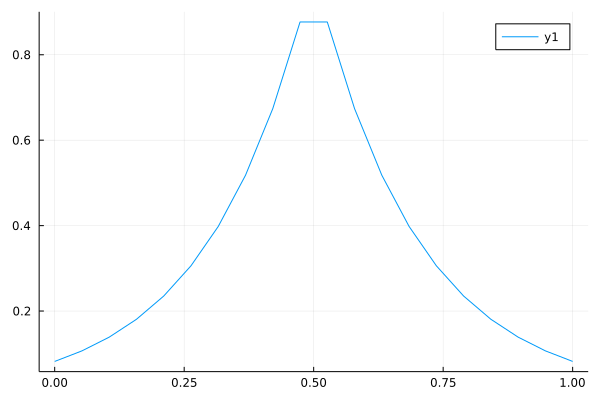

In [51]:
plot(p_grid, exp.(-5*abs.(p_grid .- 0.5)))

In [52]:
@model function water_land(W, L)
    p ~ Uniform(0, 1)
    W ~ Binomial(W + L, p)
end

water_land (generic function with 1 method)

In [56]:
Logging.disable_logging(Logging.Warn)
chain = sample(water_land(6, 3), NUTS(0.65), 1000)

Chains MCMC chain (1000×13×1 Array{Float64,3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.04 seconds
Compute duration  = 0.04 seconds
parameters        = p
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

           p    0.6399    0.1449     0.0046    0.0034   788.7260    0.9994     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           p    0.3326    0.5410    0.6550    0.7544    0.8737


In [60]:
describe(chain)

2-element Array{ChainDataFrame,1}:
 Summary Statistics (1 x 8)
 Quantiles (1 x 6)

In [62]:
quantile(chain, q=[0.89])

Quantiles
  parameters     89.0% 
      Symbol   Float64 

           p    0.8081


In [77]:
summarize(chain, sections=(:parameters,))

Summary Statistics
                    parameters      mean       std   naive_se      mcse        ⋯
                        Symbol   Float64   Float64    Float64   Float64     Fl ⋯

                             p    0.6399    0.1449     0.0046    0.0034    788 ⋯
                            lp   -3.3470    0.7534     0.0238    0.0352    493 ⋯
                       n_steps    1.7140    0.9587     0.0303    0.0450    608 ⋯
                     is_accept    1.0000    0.0000     0.0000    0.0000        ⋯
               acceptance_rate    0.6950    0.3244     0.0103    0.0103    959 ⋯
                   log_density   -3.3470    0.7534     0.0238    0.0352    493 ⋯
            hamiltonian_energy    3.8597    1.0452     0.0331    0.0624    475 ⋯
      hamiltonian_energy_error   -0.0031    0.6151     0.0195    0.0055   3797 ⋯
  max_hamiltonian_energy_error    0.6895    1.5334     0.0485    0.0562    947 ⋯
                    tree_depth    1.1540    0.3611     0.0114    0.0161    765 ⋯
        

In [73]:
chain.name_map

(parameters = [:p], internals = [:lp, :n_steps, :is_accept, :acceptance_rate, :log_density, :hamiltonian_energy, :hamiltonian_energy_error, :max_hamiltonian_energy_error, :tree_depth, :numerical_error, :step_size, :nom_step_size])

In [84]:
b = Beta(W+1, L+1)

Beta{Float64}(α=7.0, β=4.0)

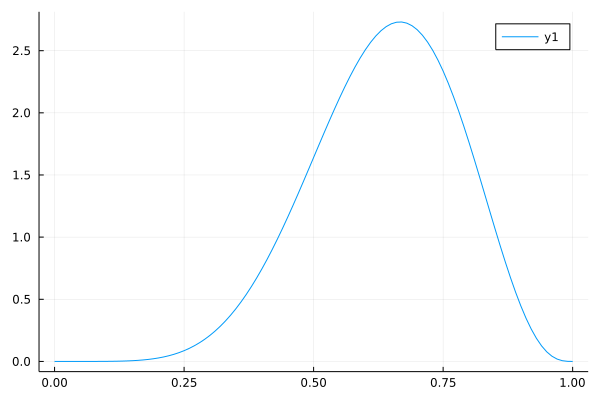

In [86]:
plot(x, pdf(b, x))

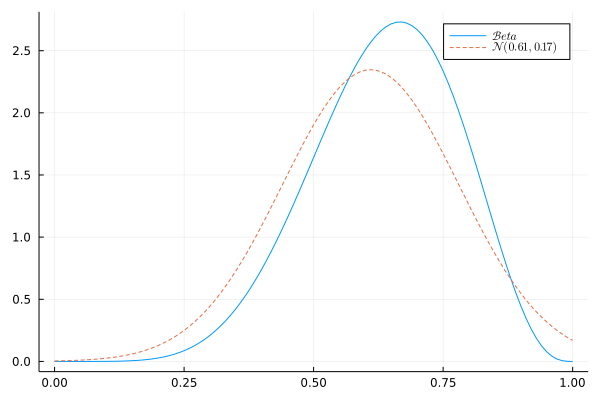

In [113]:
# analytical calculation
W = 6
L = 3
x = range(0, 1; length=101)

b = Beta(W+1, L+1)
plot(x, pdf(b, x); label = L"\mathcal{Beta}")

# quadratic approximation
b = Normal(0.61, 0.17)
plot!(x, pdf(b, x); style=:dash, label=L"\mathcal{N}(0.61, 0.17)")

In [137]:
n_samples = 1000
p = Vector{Float64}(undef, n_samples)
p[1] = 0.5
W, L = 6, 3

for i ∈ 2:n_samples
    p_old = p[i-1]
    p_new = rand(Normal(p_old, 0.1))
    if p_new < 0
        p_new = abs(p_new)
    elseif p_new > 1
        p_new = 2-p_new
    end

    q0 = pdf(Binomial(W+L, p_old), W)
    q1 = pdf(Binomial(W+L, p_new), W)
    u = rand(Uniform())
    p[i] = (u < q1 / q0) ? p_new : p_old
end

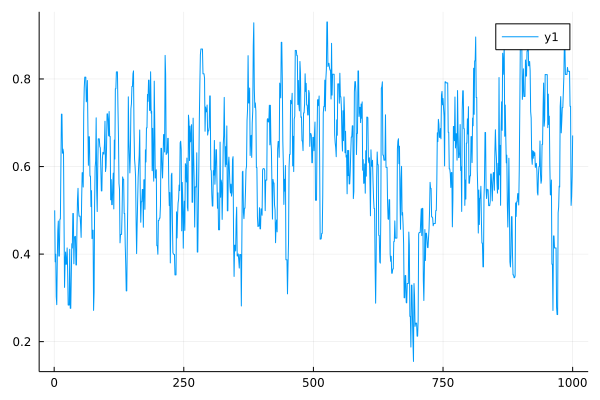

In [139]:
plot(p)

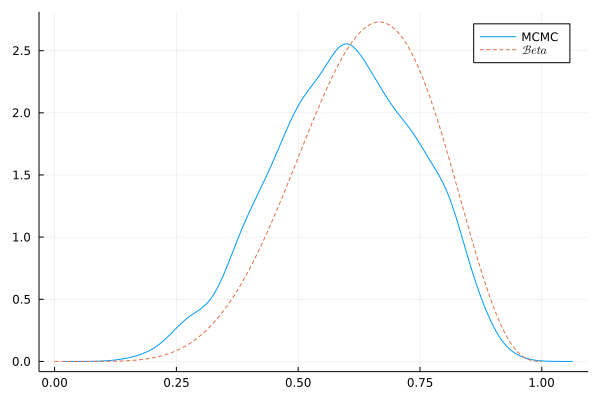

In [143]:
density(p; label = "MCMC")
b = Beta(W+1, L+1)
plot!(x, pdf(b, x); label = L"\mathcal{Beta}", style=:dash)